In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex

In [2]:
df = pd.read_csv('/content/ETH-USD.csv')

In [3]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,168.008850,172.922913,166.901093,170.930893,170.930893,11004476145
1,2020-01-28,170.884857,176.370316,170.738068,176.370316,176.370316,11772875064
2,2020-01-29,176.347885,178.842972,175.050339,175.050339,175.050339,10725267311
3,2020-01-30,174.917709,186.260483,172.374634,184.690475,184.690475,12604789338
4,2020-01-31,184.736908,185.405838,176.296814,180.160172,180.160172,11728616394


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1050,2022-12-12,1263.573486,1275.610352,1243.477783,1274.619019,1274.619019,5151109364
1051,2022-12-13,1274.662476,1341.439331,1258.472412,1320.549194,1320.549194,8812883119
1052,2022-12-14,1320.688599,1346.174438,1305.833374,1309.328735,1309.328735,7830915428
1053,2022-12-15,1309.190796,1311.067139,1262.689331,1266.353882,1266.353882,6032859783
1054,2022-12-16,1266.460571,1278.156982,1162.175659,1168.259399,1168.259399,9297811507


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1.055000e+03
mean,1733.987014,1789.372769,1671.210586,1734.599027,1734.599027,1.935840e+10
std,1273.221106,1310.892164,1228.943183,1271.771057,1271.771057,1.019657e+10
min,110.406784,116.021622,95.184303,110.605873,110.605873,3.282500e+09
25%,400.600280,411.254089,389.961532,401.866287,401.866287,1.280173e+10
50%,1578.383911,1643.183228,1534.298828,1579.704590,1579.704590,1.703050e+10
75%,2753.332886,2837.765991,2623.141357,2753.045044,2753.045044,2.294438e+10
max,4810.071289,4891.704590,4718.039063,4812.087402,4812.087402,8.448291e+10


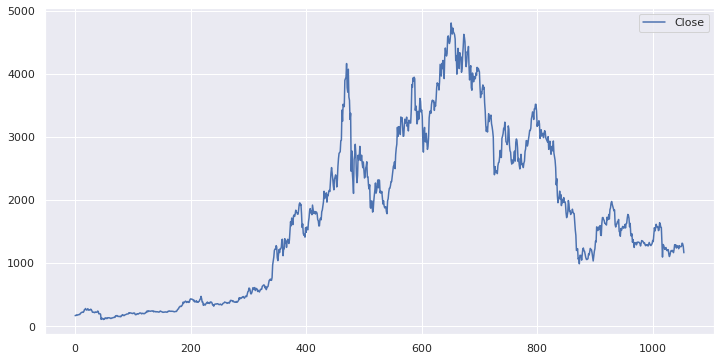

In [6]:
df[['Close']].plot(figsize=(12,6));


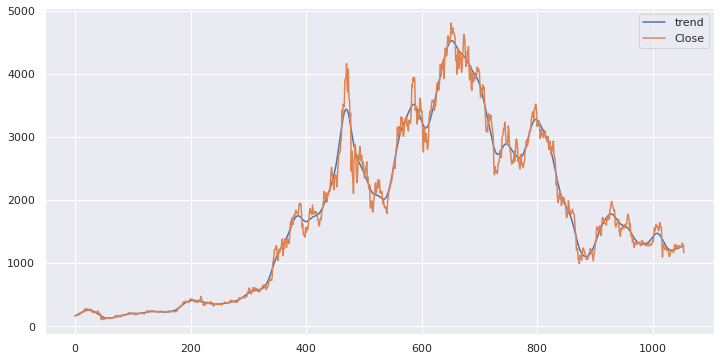

In [7]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['Close'], lamb=1600)
df['trend'] = gdp_trend
df[['trend','Close']].plot(figsize=(12,6))
#tendencia

In [8]:
sts.adfuller(df.Close)
#no se rechaza la hipotesis nula
#la serie no es estacionaria

(-1.5875932105481336,
 0.4898228120747416,
 6,
 1048,
 {'1%': -3.436605142651622,
  '5%': -2.8643018096684587,
  '10%': -2.568240496510984},
 12503.065764337398)

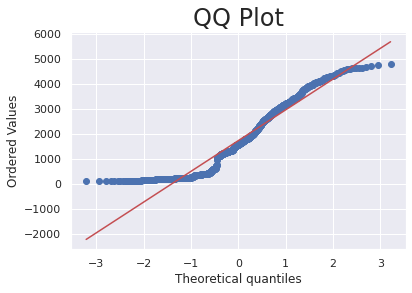

In [9]:
import scipy.stats

scipy.stats.probplot(df.Close, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [10]:
df['returns'] = df.Close.pct_change(1)*100

In [11]:
df['sq_returns'] = df.returns.mul(df.returns)


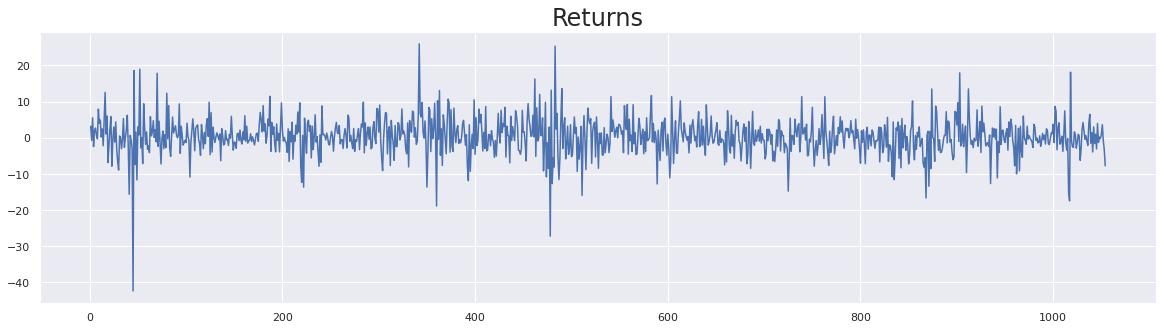

In [12]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()


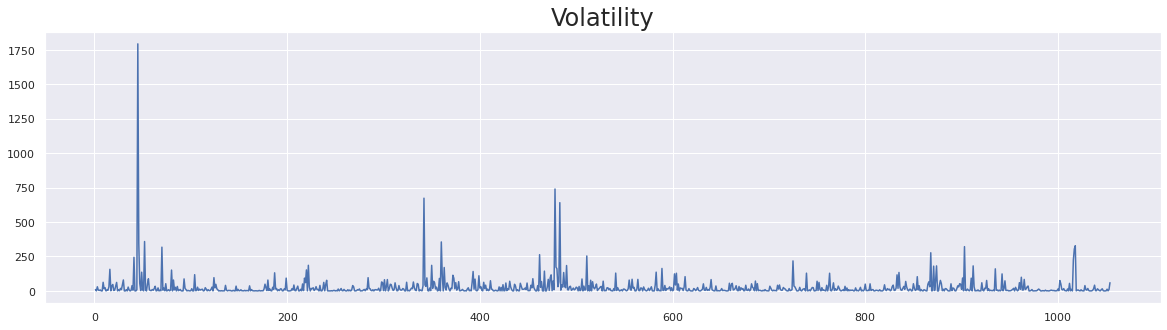

In [13]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

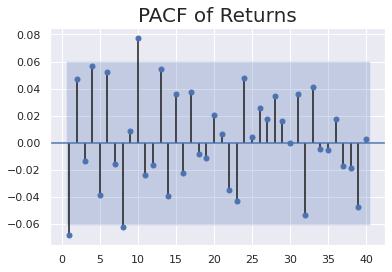

In [14]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

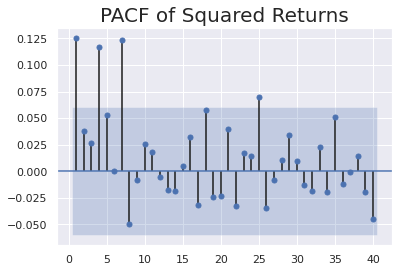

In [15]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

In [16]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 11.6 MB/s eta 0:00:00


In [17]:
from arch import arch_model


In [18]:
display(Math(r'\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p \alpha_1\in_{t-1}^2'))
#Modelo ARCH

<IPython.core.display.Math object>

In [19]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 1)
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 3240.6668856941187
Iteration:      2,   Func. Count:     11,   Neg. LLF: 3217.8132424676405
Iteration:      3,   Func. Count:     16,   Neg. LLF: 3205.985880554792
Iteration:      4,   Func. Count:     21,   Neg. LLF: 3205.65257328388
Iteration:      5,   Func. Count:     25,   Neg. LLF: 3205.646408947978
Iteration:      6,   Func. Count:     29,   Neg. LLF: 3205.646366746093
Iteration:      7,   Func. Count:     32,   Neg. LLF: 3205.6463667462667
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3205.646366746093
            Iterations: 7
            Function evaluations: 32
            Gradient evaluations: 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3205.65
Distribution:                  Normal   AIC:                           6417.29
Method:            Maximum Likelihood   BIC:                           6432.17
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:28:33   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.3349      0.155      2.163  3.056e-02 [3.140e-02,  0.638]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         23.9793      2.586      9.273  1.811e-20    [ 18.911, 29.048]
alpha[1]       0.0766  4.188e-02      1.830  6.727e-02 [-5.450e-03,  0.159]
===========================================================================

Covariance estimator: robust
"""

In [20]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     31,   Neg. LLF: 3198.381747038635
Iteration:     10,   Func. Count:     56,   Neg. LLF: 3198.113336479333
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3198.113336479371
            Iterations: 10
            Function evaluations: 56
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3198.11
Distribution:                  Normal   AIC:                           6404.23
Method:            Maximum Likelihood   BIC:                           6424.07
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:28:33   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.3678      0.149      2.468  1.360e-02 [7.569e-02,  0.660]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         21.2176      3.318      6.395  1.609e-10    [ 14.714, 27.721]
alpha[1]       0.0679  4.022e-02      1.687  9.151e-02 [-1.096e-02,  0.147]
alpha[2]       0.1273  7.875e-02      1.616      0.106 [-2.707e-02,  0.282]
===========================================================================

Covariance estimator: robust
"""

In [21]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 3214.0630566396844
Iteration:     10,   Func. Count:     70,   Neg. LLF: 3193.589101756331
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3193.589101756327
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3193.59
Distribution:                  Normal   AIC:                           6397.18
Method:            Maximum Likelihood   BIC:                           6421.98
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:28:33   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.3933      0.149      2.645  8.166e-03 [  0.102,  0.685]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         19.9943      3.644      5.488  4.074e-08    [ 12.853, 27.136]
alpha[1]       0.0579  3.357e-02      1.726  8.433e-02 [-7.851e-03,  0.124]
alpha[2]       0.1152  7.670e-02      1.502      0.133 [-3.516e-02,  0.266]
alpha[3]       0.0670  4.242e-02      1.579      0.114 [-1.617e-02,  0.150]
===========================================================================

Covariance estimator: robust
"""

In [22]:
model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     89,   Neg. LLF: 3356.232192190211
Iteration:     10,   Func. Count:    175,   Neg. LLF: 3206.3645716009487
Iteration:     15,   Func. Count:    262,   Neg. LLF: 3159.863666342546
Iteration:     20,   Func. Count:    347,   Neg. LLF: 3149.365430794518
Iteration:     25,   Func. Count:    429,   Neg. LLF: 3147.6713631452826
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3147.6713622032566
            Iterations: 25
            Function evaluations: 429
            Gradient evaluations: 25


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3147.67
Distribution:                  Normal   AIC:                           6325.34
Method:            Maximum Likelihood   BIC:                           6399.75
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:28:33   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.3794      0.150      2.525  1.158e-02 [8.488e-02,  0.674]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega         10.3560      4.640      2.232  2.561e-02      [  1.262, 19.450]
alpha[1]       0.0752  3.918e-02      1.919  5.493e-02   [-1.588e-03,  0.152]
alpha[2]       0.1148  4.884e-02      2.351  1.871e-02    [1.911e-02,  0.211]
alpha[3]       0.0376  4.327e-02      0.869      0.385   [-4.720e-02,  0.122]
alpha[4]       0.1683  9.830e-02      1.712  8.697e-02   [-2.441e-02,  0.361]
alpha[5]       0.0268  6.427e-02      0.416      0.677   [-9.922e-02,  0.153]
alpha[6]   3.0529e-03  5.920e-02  5.157e-02      0.959      [ -0.113,  0.119]
alpha[7]       0.1065  7.748e-02      1.375      0.169   [-4.533e-02,  0.258]
alpha[8]   4.4145e-03  2.179e-02      0.203      0.839 [-3.828e-02,4.711e-02]
alpha[9]       0.0000  8.064e-02      0.000      1.000      [ -0.158,  0.158]
alpha[10]      0.0250  2.622e-02      0.954      0.340 [-2.638e-02,7.642e-02]
alpha[11]      0.0766  7.001e-02      1.094      0.274   [-6.063e-02,  0.214]
alpha[12]      0.0000  7.439e-02      0.000      1.000      [ -0.146,  0.146]
alpha[13]      0.0000      0.166      0.000      1.000      [ -0.326,  0.326]
=============================================================================

Covariance estimator: robust
"""

In [23]:
display(Math(r'\sigma_t^2 = \Omega + \sum_{i=1}^p\alpha_1\in_{t-1}^2 + \sum_{j=1}^p\beta_1\sigma_{t-1}^2'))
#Modelo GARCH

<IPython.core.display.Math object>

In [24]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     33,   Neg. LLF: 3175.022285275581
Iteration:     10,   Func. Count:     61,   Neg. LLF: 3164.945696157891
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3164.945690329388
            Iterations: 12
            Function evaluations: 70
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3164.95
Distribution:                  Normal   AIC:                           6337.89
Method:            Maximum Likelihood   BIC:                           6357.73
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:28:34   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.3541      0.136      2.610  9.044e-03 [8.822e-02,  0.620]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          1.4451      0.925      1.563      0.118   [ -0.367,  3.257]
alpha[1]       0.1037  4.494e-02      2.307  2.105e-02 [1.560e-02,  0.192]
beta[1]        0.8472  6.040e-02     14.027  1.070e-44   [  0.729,  0.966]
==========================================================================

Covariance estimator: robust
"""

In [25]:
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 3177.708543512121
Iteration:     10,   Func. Count:     71,   Neg. LLF: 3165.000612408422
Iteration:     15,   Func. Count:    100,   Neg. LLF: 3164.9456903890036
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3164.945690333272
            Iterations: 15
            Function evaluations: 100
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3164.95
Distribution:                  Normal   AIC:                           6339.89
Method:            Maximum Likelihood   BIC:                           6364.69
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:28:34   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.3541      0.138      2.570  1.017e-02 [8.404e-02,  0.624]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.4452      0.917      1.577      0.115    [ -0.351,  3.242]
alpha[1]       0.1037  5.675e-02      1.827  6.770e-02 [-7.546e-03,  0.215]
beta[1]        0.8472      1.108      0.765      0.444    [ -1.324,  3.019]
beta[2]        0.0000      1.046      0.000      1.000    [ -2.049,  2.049]
===========================================================================

Covariance estimator: robust
"""

In [26]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     42,   Neg. LLF: 3181.80816746654
Iteration:     10,   Func. Count:     81,   Neg. LLF: 3166.6536904953446
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3161.968780482308
            Iterations: 14
            Function evaluations: 109
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3161.97
Distribution:                  Normal   AIC:                           6335.94
Method:            Maximum Likelihood   BIC:                           6365.70
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:28:34   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.3525      0.138      2.558  1.053e-02 [8.240e-02,  0.623]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          2.3192      1.075      2.157  3.103e-02   [  0.212,  4.427]
alpha[1]       0.1784  7.234e-02      2.466  1.368e-02 [3.658e-02,  0.320]
beta[1]        0.1882      0.156      1.206      0.228   [ -0.118,  0.494]
beta[2]        0.0117      0.111      0.105      0.916   [ -0.206,  0.230]
beta[3]        0.5433      0.108      5.030  4.914e-07   [  0.332,  0.755]
==========================================================================

Covariance estimator: robust
"""

In [27]:
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     38,   Neg. LLF: 3170.3366905853973
Iteration:     10,   Func. Count:     69,   Neg. LLF: 3164.015159677847
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3164.015159677957
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3164.02
Distribution:                  Normal   AIC:                           6338.03
Method:            Maximum Likelihood   BIC:                           6362.83
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:28:34   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.3586      0.137      2.619  8.829e-03 [9.019e-02,  0.627]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          2.1223      2.282      0.930      0.352    [ -2.351,  6.595]
alpha[1]       0.0666  3.977e-02      1.673  9.423e-02 [-1.139e-02,  0.145]
alpha[2]       0.0599  9.631e-02      0.622      0.534    [ -0.129,  0.249]
beta[1]        0.7993      0.152      5.260  1.441e-07    [  0.501,  1.097]
===========================================================================

Covariance estimator: robust
"""

In [28]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 3175.5920627346723
Iteration:     10,   Func. Count:     84,   Neg. LLF: 3163.988449565532
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3163.988448337237
            Iterations: 12
            Function evaluations: 97
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3163.99
Distribution:                  Normal   AIC:                           6339.98
Method:            Maximum Likelihood   BIC:                           6369.74
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:28:34   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.3594      0.139      2.579  9.905e-03 [8.629e-02,  0.633]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          2.2984      3.851      0.597      0.551    [ -5.249,  9.846]
alpha[1]       0.0658  4.139e-02      1.590      0.112 [-1.532e-02,  0.147]
alpha[2]       0.0554  7.271e-02      0.762      0.446 [-8.713e-02,  0.198]
alpha[3]       0.0107      0.127  8.429e-02      0.933    [ -0.239,  0.260]
beta[1]        0.7872      0.264      2.978  2.899e-03    [  0.269,  1.305]
===========================================================================

Covariance estimator: robust
"""

In [29]:
display(Math(r'ln\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p\alpha_i(|\in_{t-i}|+\gamma_i\in_{t_i}) + \sum_{j=1}^q\beta_j\ln\sigma_{t-j}^2'))
#Modelo EGARCH

<IPython.core.display.Math object>

In [30]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "EGARCH", p = 1, o = 1, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 3179.2076406608066
Iteration:     10,   Func. Count:     76,   Neg. LLF: 3163.7680070584765
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3163.768007062431
            Iterations: 10
            Function evaluations: 76
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -3163.77
Distribution:                  Normal   AIC:                           6337.54
Method:            Maximum Likelihood   BIC:                           6362.34
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:28:34   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.3052      0.137      2.236  2.538e-02 [3.763e-02,  0.573]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.2594      0.148      1.753  7.956e-02 [-3.059e-02,  0.549]
alpha[1]       0.2232  6.209e-02      3.594  3.259e-04    [  0.101,  0.345]
gamma[1]      -0.0632  6.304e-02     -1.002      0.316  [ -0.187,6.037e-02]
beta[1]        0.9234  4.543e-02     20.324  7.850e-92    [  0.834,  1.012]
===========================================================================

Covariance estimator: robust
"""

In [31]:
display(Math(r'\sigma_t^2 = \omega + \sum_{i=1}^p\alpha\in_{t-1}^2 + \gamma\in_{t-1}^2I_{|\in_{t-1}<0|} + \sum_{j=1}^p\beta\sigma_{t-1}^2 '))
#modelo GJR-GARCH

<IPython.core.display.Math object>

In [32]:
am = arch_model(df.returns[1:], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -3160.54
Distribution:                  Normal   AIC:                           6331.08
Method:            Maximum Likelihood   BIC:                           6355.88
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:28:35   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2951      0.139      2.124  3.365e-02 [2.282e-02,  0.567]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          2.4608      1.990      1.237      0.216    [ -1.440,  6.361]
alpha[1]       0.0550  3.554e-02      1.548      0.122 [-1.464e-02,  0.125]
gamma[1]       0.1066      0.108      0.991      0.322    [ -0.104,  0.317]
beta[1]        0.8013      0.101      7.916  2.460e-15    [  0.603,  1.000]
===========================================================================

Covariance estimator: robust
"""

In [33]:
display(Math(r'\sigma_t = \omega + \sum_{p=1}^1\alpha\in_{t-1} + \sum_{o=1}^o\gamma\in_{t-1}I_{|\in_{t-1}<0|} + \sum_{q=1}^q\beta\sigma_{t-1}'))
#modelo TARCH

<IPython.core.display.Math object>

In [34]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 8690.521207707752
Iteration:     10,   Func. Count:     74,   Neg. LLF: 3169.286989130704
Iteration:     15,   Func. Count:    107,   Neg. LLF: 3166.5358421422666
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3166.535837667442
            Iterations: 17
            Function evaluations: 118
            Gradient evaluations: 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -3166.54
Distribution:                  Normal   AIC:                           6343.07
Method:            Maximum Likelihood   BIC:                           6367.87
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:28:35   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.3233      0.136      2.375  1.756e-02 [5.648e-02,  0.590]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.3534      0.312      1.133      0.257    [ -0.258,  0.965]
alpha[1]       0.0776  2.787e-02      2.784  5.363e-03  [2.298e-02,  0.132]
gamma[1]       0.0634  7.923e-02      0.801      0.423 [-9.186e-02,  0.219]
beta[1]        0.8506  7.779e-02     10.934  7.907e-28    [  0.698,  1.003]
===========================================================================

Covariance estimator: robust
"""

In [35]:
display(Math(r'h_t = \omega + [1 - \beta\ L - \phi\ L(1-L)^\delta]\in_t^2 + \beta\ h_{t-1}'))
#modelo FIGARCH

<IPython.core.display.Math object>

In [36]:
from arch.univariate import FIGARCH

In [37]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "FIGARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 3174.9002349526154
Iteration:     10,   Func. Count:     70,   Neg. LLF: 3165.4636847428374
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3165.4636823993624
            Iterations: 12
            Function evaluations: 81
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Constant Mean - FIGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    FIGARCH   Log-Likelihood:               -3165.46
Distribution:                  Normal   AIC:                           6340.93
Method:            Maximum Likelihood   BIC:                           6365.73
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:28:35   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.3381      0.131      2.572  1.011e-02 [8.045e-02,  0.596]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.7634      0.786      2.242  2.494e-02    [  0.222,  3.305]
phi            0.1076      0.133      0.811      0.418    [ -0.152,  0.368]
d              0.4668      0.338      1.380      0.167    [ -0.196,  1.130]
beta           0.4835      0.284      1.703  8.864e-02 [-7.309e-02,  1.040]
===========================================================================

Covariance estimator: robust
"""

In [38]:
display(Math(r'\sigma_t^2 = \omega + \in_{i=1}^m \alpha_l(l_i^{-1} \sum_{j+1}^l \in_{t-j}^2)'))
#modelo HARCH

<IPython.core.display.Math object>

In [39]:
from arch.univariate import HARCH

In [40]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "HARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     30,   Neg. LLF: 3980.07862222267
Iteration:     10,   Func. Count:     51,   Neg. LLF: 3206.169903338101
Iteration:     15,   Func. Count:     71,   Neg. LLF: 3205.6817370992203
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3205.6463666838827
            Iterations: 19
            Function evaluations: 87
            Gradient evaluations: 19


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - HARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      HARCH   Log-Likelihood:               -3205.65
Distribution:                  Normal   AIC:                           6417.29
Method:            Maximum Likelihood   BIC:                           6432.17
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:28:35   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.3349      0.155      2.163  3.056e-02 [3.140e-02,  0.638]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         23.9794      2.586      9.273  1.810e-20    [ 18.911, 29.048]
alpha[1]       0.0766  4.187e-02      1.830  6.727e-02 [-5.448e-03,  0.159]
===========================================================================

Covariance estimator: robust
"""

In [41]:
display(Math(r'\sigma_t^\delta = \omega + \sum_{i=1}^p\alpha_i(|\in_{t-1}|-\gamma_i\ I_{[0>i]}\in_{t-i})^\delta + \sum_{k=1}^q \beta_k \sigma_{t-k}^\delta'))
#modelo APARCH

<IPython.core.display.Math object>

In [42]:
from arch.univariate import APARCH


In [43]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=2.0, vol = "APARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 3445.427765573806
Iteration:     10,   Func. Count:     82,   Neg. LLF: 3160.223566016268
Iteration:     15,   Func. Count:    118,   Neg. LLF: 3159.6339375468
Iteration:     20,   Func. Count:    153,   Neg. LLF: 3159.2602946783513
Iteration:     25,   Func. Count:    188,   Neg. LLF: 3159.025516914873
Iteration:     30,   Func. Count:    223,   Neg. LLF: 3158.9253992150375
Iteration:     35,   Func. Count:    259,   Neg. LLF: 3158.8392736132346
Iteration:     40,   Func. Count:    295,   Neg. LLF: 3158.769575833431
Iteration:     45,   Func. Count:    330,   Neg. LLF: 3158.737645206984
Iteration:     50,   Func. Count:    366,   Neg. LLF: 3158.7143721661114
Iteration:     55,   Func. Count:    403,   Neg. LLF: 3158.7037988294787
Iteration:     60,   Func. Count:    437,   Neg. LLF: 3158.7028633953632
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3158.7028633944756
            Iterations:

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - APARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     APARCH   Log-Likelihood:               -3158.70
Distribution:                  Normal   AIC:                           6329.41
Method:            Maximum Likelihood   BIC:                           6359.17
                                        No. Observations:                 1054
Date:                Thu, Jan 26 2023   Df Residuals:                     1053
Time:                        02:28:36   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.3369      0.160      2.106  3.517e-02 [2.342e-02,  0.650]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega        112.9454   1162.935  9.712e-02      0.923 [-2.166e+03,2.392e+03]
alpha[1]       0.0337      0.143      0.235      0.814      [ -0.247,  0.315]
gamma[1]       0.3796      0.566      0.671      0.502      [ -0.729,  1.488]
beta[1]        0.6481      0.489      1.325      0.185      [ -0.310,  1.607]
delta          4.0000      5.691      0.703      0.482      [ -7.154, 15.154]
=============================================================================

Covariance estimator: robust
"""

In [44]:
from scipy import stats


In [45]:
jarque_bera_test = stats.jarque_bera(df.Close)
jarque_bera_test

Jarque_beraResult(statistic=69.07615719982809, pvalue=9.992007221626409e-16)

In [46]:
jarque_bera_test.statistic

69.07615719982809

In [47]:
jarque_bera_test.pvalue

9.992007221626409e-16

jarquer-bera para los retornos

In [48]:
returns = df.returns[1:]
returns

1       3.182235
2      -0.748412
3       5.507065
4      -2.452916
5       1.950363
          ...   
1050    0.850602
1051    3.603443
1052   -0.849681
1053   -3.282205
1054   -7.746214
Name: returns, Length: 1054, dtype: float64

In [49]:
jarque_bera_test = stats.jarque_bera(returns)
jarque_bera_test

Jarque_beraResult(statistic=2239.383635514642, pvalue=0.0)

In [50]:
jarque_bera_test.statistic

2239.383635514642

In [51]:
jarque_bera_test.pvalue

0.0

curtosis

In [52]:
returns.kurt()

7.119796935869907

coef. asimetria

In [53]:
returns.skew()

-0.46431090505278677

In [54]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(df.returns[1:])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -34.611
P-value                         0.000
Lags                               22
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [55]:
from arch.unitroot import DFGLS

dfgls = DFGLS(df.returns[1:])
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -4.663
P-value                         0.000
Lags                                9
-------------------------------------

Trend: Constant
Critical Values: -2.59 (1%), -1.96 (5%), -1.64 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [56]:
from arch.unitroot import ADF

adf = ADF(df.returns[1:])
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -9.624
P-value                         0.000
Lags                                9
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [57]:
from arch.unitroot import KPSS

kpss = KPSS(df.returns[1:])
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.606
P-value                         0.022
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [58]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [59]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1055 non-null   object 
 1   Open        1055 non-null   float64
 2   High        1055 non-null   float64
 3   Low         1055 non-null   float64
 4   Close       1055 non-null   float64
 5   Adj Close   1055 non-null   float64
 6   Volume      1055 non-null   int64  
 7   trend       1055 non-null   float64
 8   returns     1054 non-null   float64
 9   sq_returns  1054 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 82.5+ KB


In [61]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [62]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

predictions

BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [63]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [64]:
def trading_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)
  
  # return the new dataset 
  return data

In [65]:
data = pd.read_csv("/content/ETH-USD.csv")

In [66]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,168.008850,172.922913,166.901093,170.930893,170.930893,11004476145
1,2020-01-28,170.884857,176.370316,170.738068,176.370316,176.370316,11772875064
2,2020-01-29,176.347885,178.842972,175.050339,175.050339,175.050339,10725267311
3,2020-01-30,174.917709,186.260483,172.374634,184.690475,184.690475,12604789338
4,2020-01-31,184.736908,185.405838,176.296814,180.160172,180.160172,11728616394
...,...,...,...,...,...,...,...
1050,2022-12-12,1263.573486,1275.610352,1243.477783,1274.619019,1274.619019,5151109364
1051,2022-12-13,1274.662476,1341.439331,1258.472412,1320.549194,1320.549194,8812883119
1052,2022-12-14,1320.688599,1346.174438,1305.833374,1309.328735,1309.328735,7830915428
1053,2022-12-15,1309.190796,1311.067139,1262.689331,1266.353882,1266.353882,6032859783


In [67]:
data = data[["Date","Close","Volume"]]


In [68]:
data

,Date,Close,Volume
0,2020-01-27,170.930893,11004476145
1,2020-01-28,176.370316,11772875064
2,2020-01-29,175.050339,10725267311
3,2020-01-30,184.690475,12604789338
4,2020-01-31,180.160172,11728616394
...,...,...,...
1050,2022-12-12,1274.619019,5151109364
1051,2022-12-13,1320.549194,8812883119
1052,2022-12-14,1309.328735,7830915428
1053,2022-12-15,1266.353882,6032859783


In [69]:
price_volume_target_df = trading_window(data)
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27,170.930893,11004476145,176.370316
1,2020-01-28,176.370316,11772875064,175.050339
2,2020-01-29,175.050339,10725267311,184.690475
3,2020-01-30,184.690475,12604789338,180.160172
4,2020-01-31,180.160172,11728616394,183.673950
...,...,...,...,...
1050,2022-12-12,1274.619019,5151109364,1320.549194
1051,2022-12-13,1320.549194,8812883119,1309.328735
1052,2022-12-14,1309.328735,7830915428,1266.353882
1053,2022-12-15,1266.353882,6032859783,1168.259399


In [70]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27,170.930893,11004476145,176.370316
1,2020-01-28,176.370316,11772875064,175.050339
2,2020-01-29,175.050339,10725267311,184.690475
3,2020-01-30,184.690475,12604789338,180.160172
4,2020-01-31,180.160172,11728616394,183.673950
...,...,...,...,...
1049,2022-12-11,1263.868530,3362005848,1274.619019
1050,2022-12-12,1274.619019,5151109364,1320.549194
1051,2022-12-13,1320.549194,8812883119,1309.328735
1052,2022-12-14,1309.328735,7830915428,1266.353882


In [71]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [72]:
price_volume_target_scaled_df

array([[0.01283107, 0.09509774, 0.01398803],
       [0.01398803, 0.10456074, 0.01370727],
       [0.01370727, 0.09165923, 0.01575771],
       ...,
       [0.25735363, 0.06810782, 0.25496705],
       [0.25496705, 0.05601468, 0.24582634],
       [0.24582634, 0.03387125, 0.22496175]])

In [73]:
price_volume_target_scaled_df.shape

(1054, 3)

In [74]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [75]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((1054, 2), (1054, 1))

In [76]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [77]:
X_train.shape, y_train.shape

((685, 2), (685, 1))

In [78]:
X_test.shape, y_test.shape

((369, 2), (369, 1))

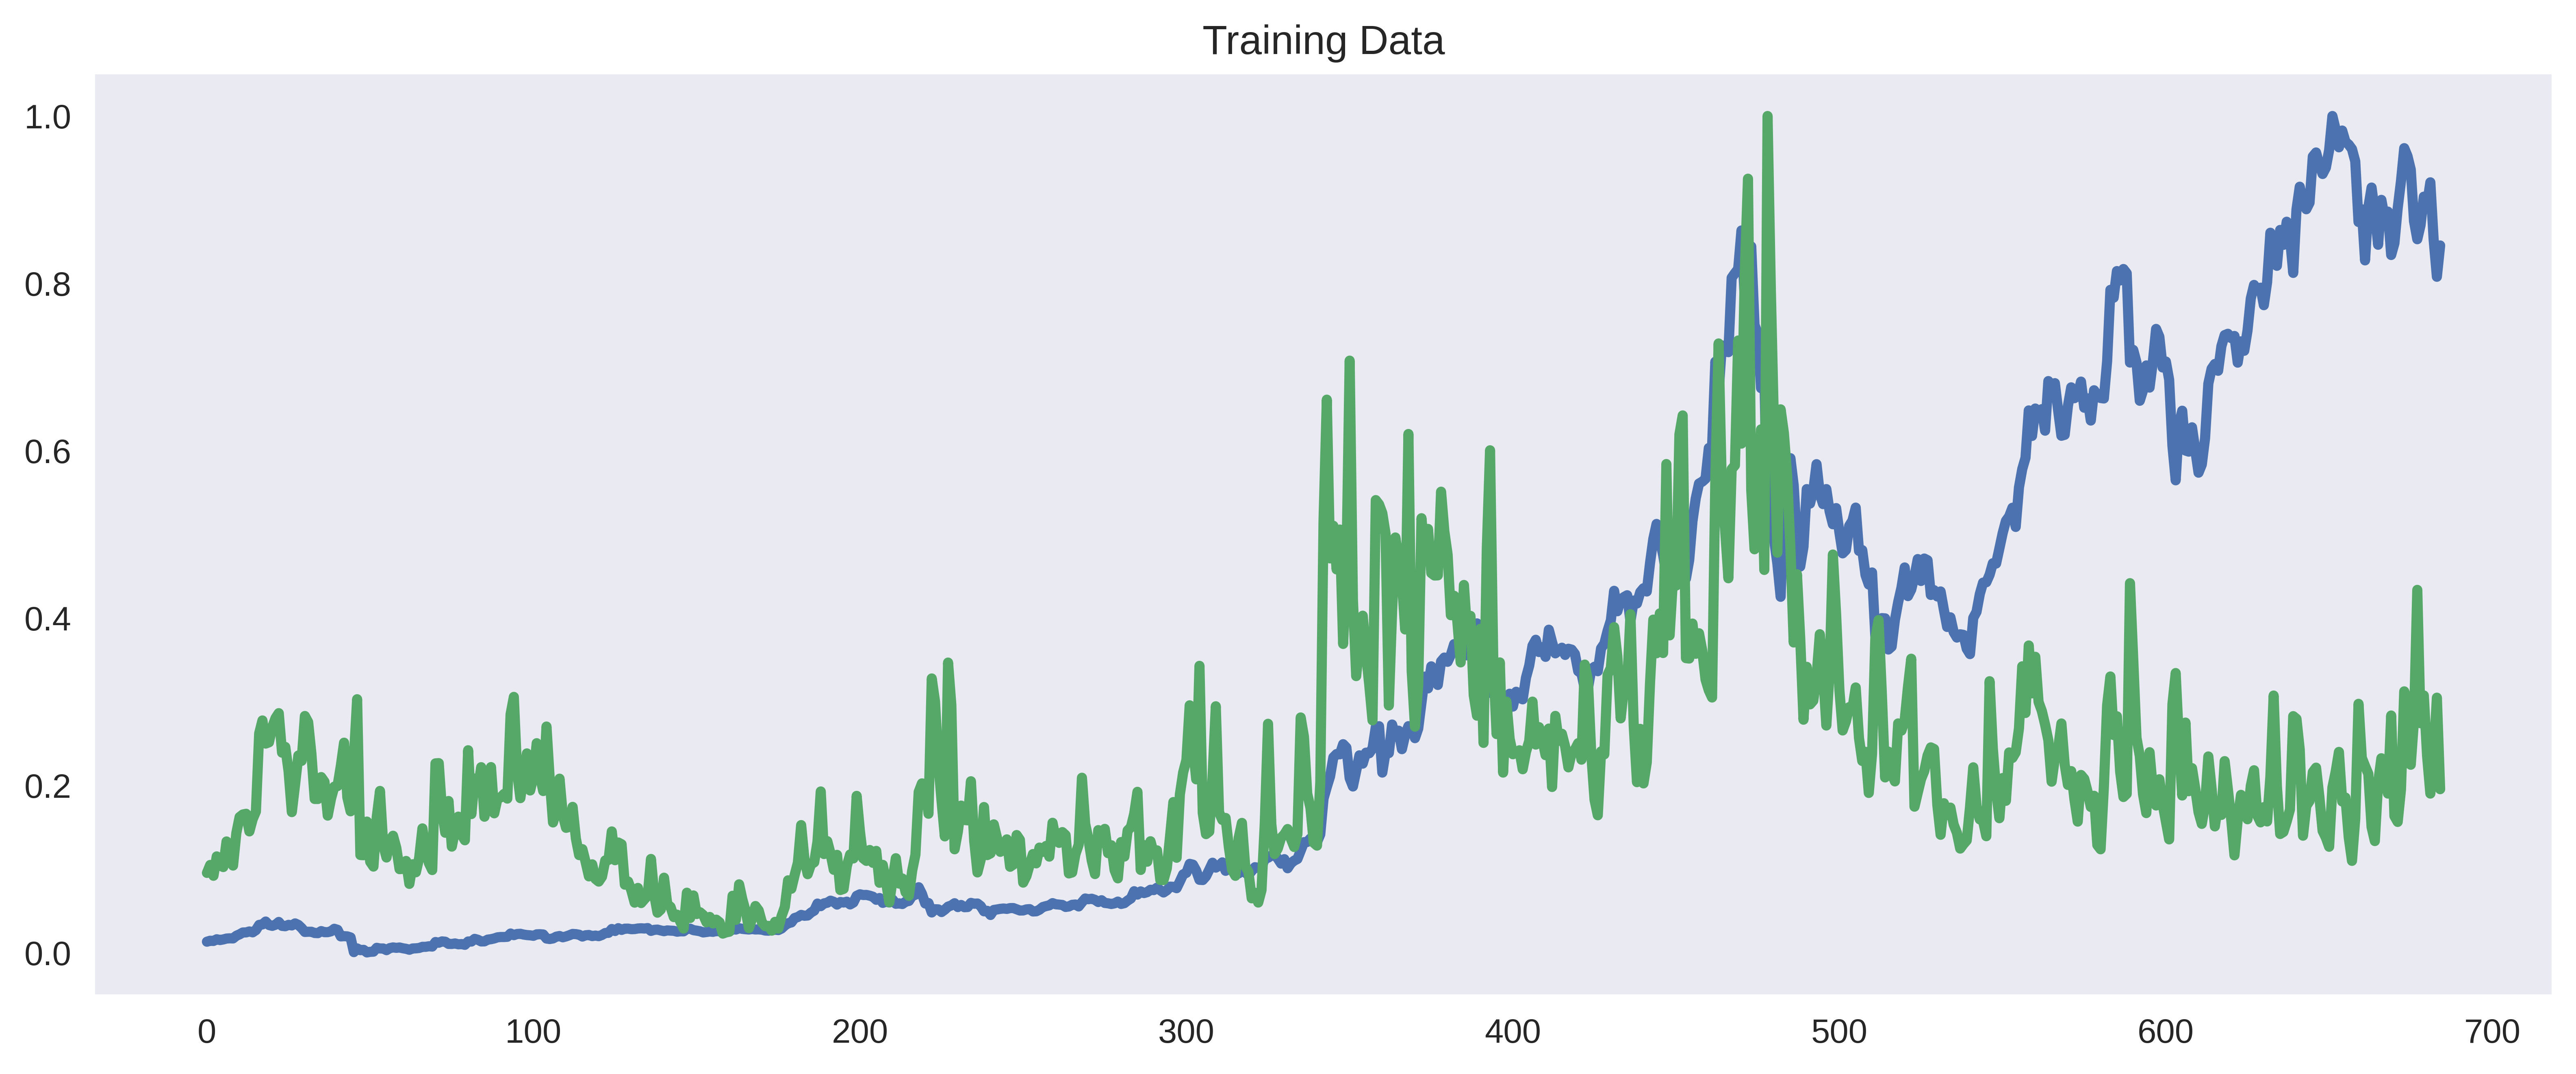

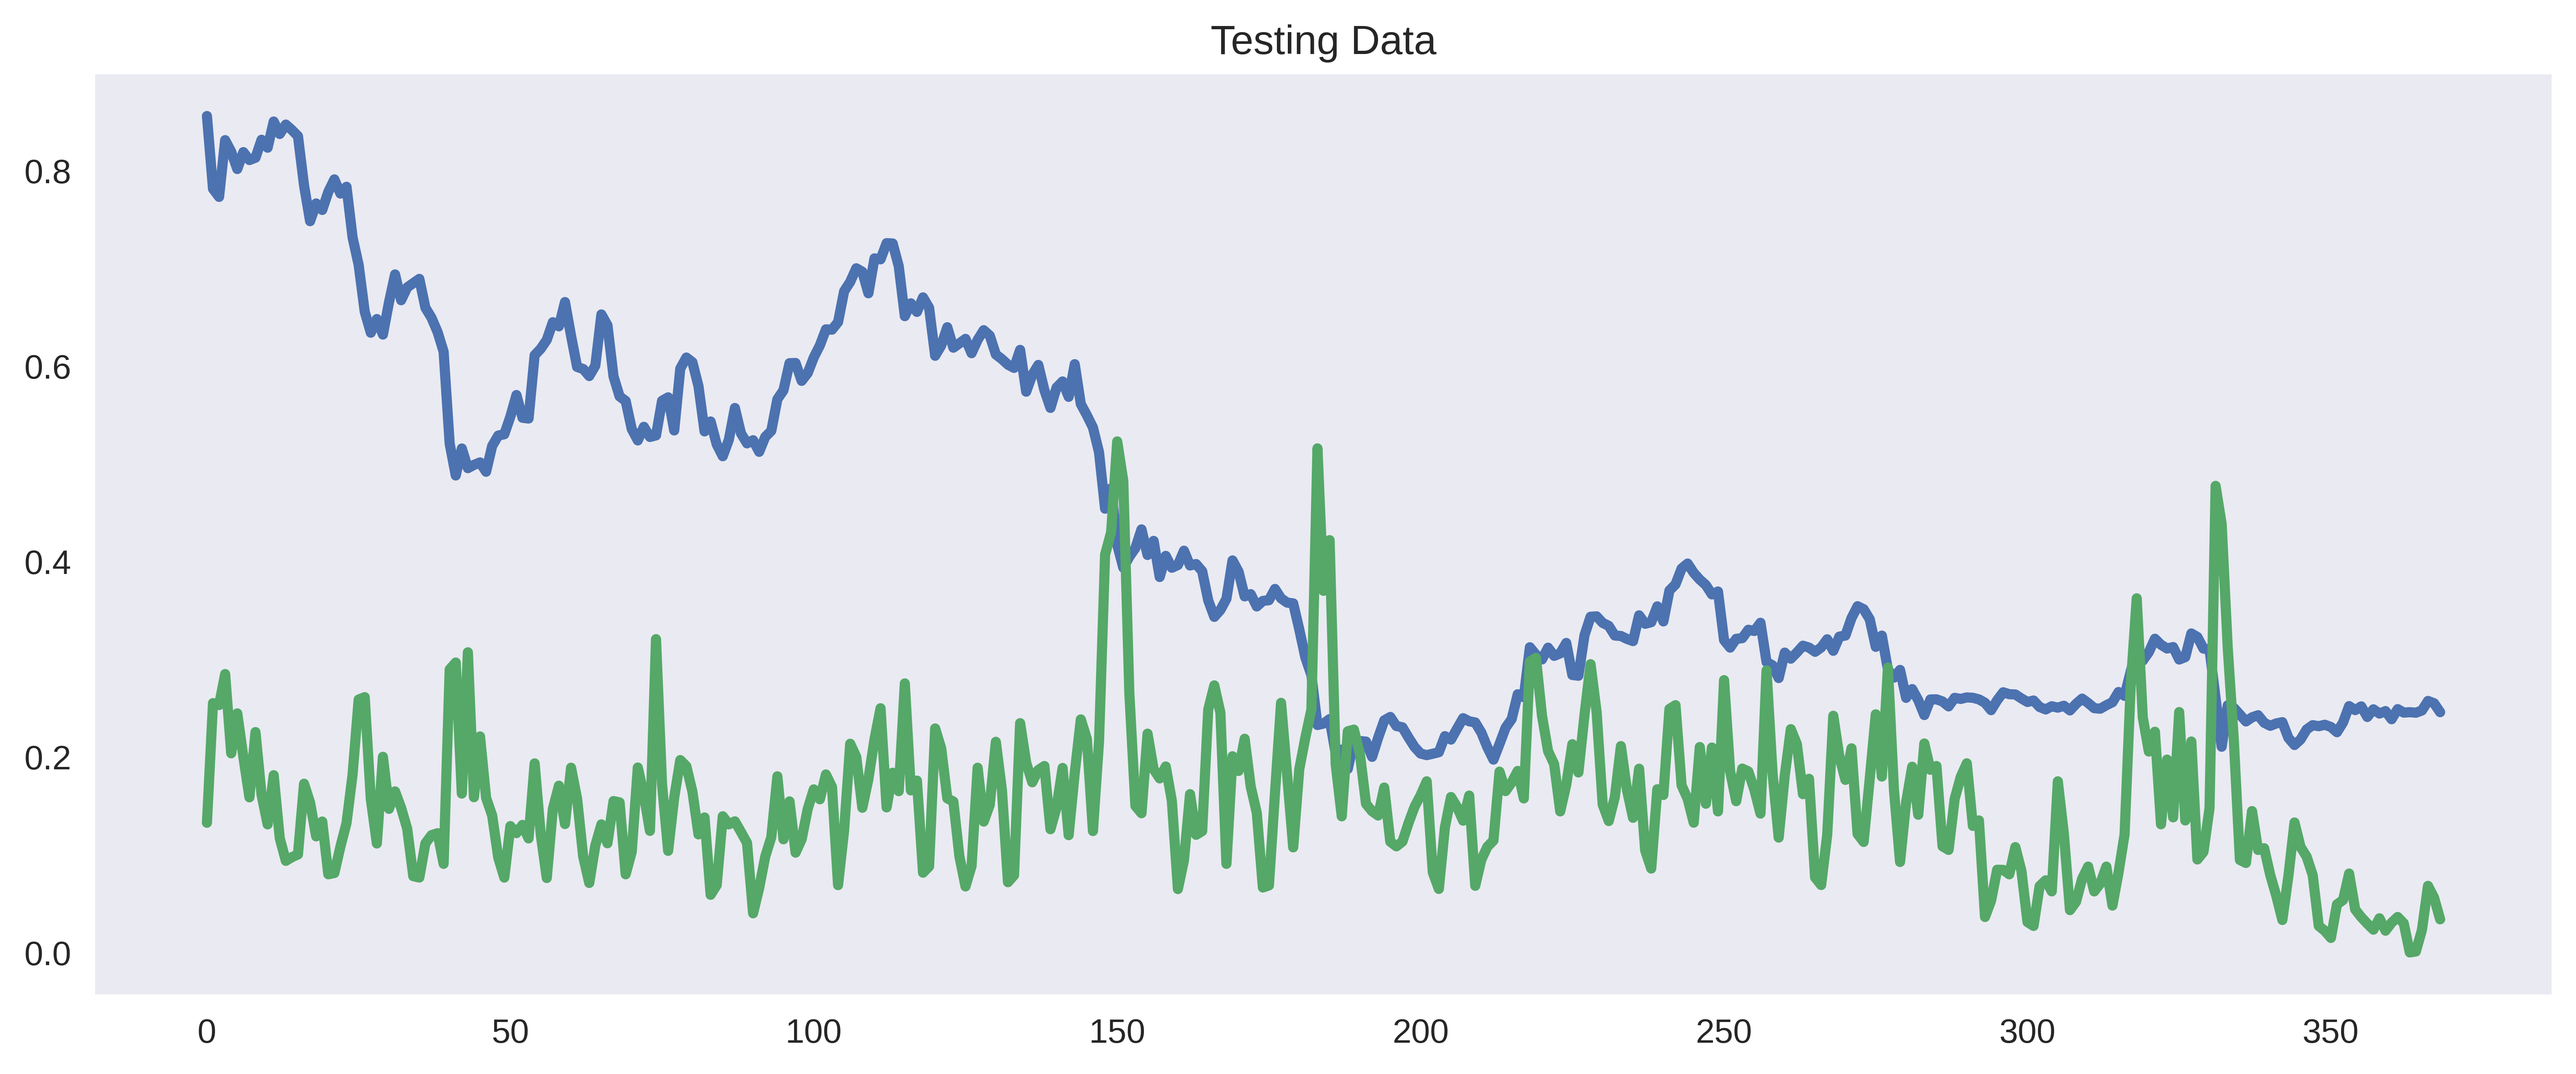

In [79]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [80]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()

regression_model.fit(X_train, y_train)

Ridge()

In [81]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.9879909764406787


In [82]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.01742365],
       [0.01876652],
       [0.0182045 ],
       ...,
       [0.25610237],
       [0.25349767],
       [0.24405988]])

In [83]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [84]:
len(Predicted)

1054

In [85]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [86]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2020-01-27
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
...,...
1049,2022-12-11
1050,2022-12-12
1051,2022-12-13
1052,2022-12-14


In [87]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2020-01-27,0.012831
1,2020-01-28,0.013988
2,2020-01-29,0.013707
3,2020-01-30,0.015758
4,2020-01-31,0.014794
...,...,...
1049,2022-12-11,0.245298
1050,2022-12-12,0.247584
1051,2022-12-13,0.257354
1052,2022-12-14,0.254967


In [88]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2020-01-27,0.012831,0.017424
1,2020-01-28,0.013988,0.018767
2,2020-01-29,0.013707,0.018204
3,2020-01-30,0.015758,0.020726
4,2020-01-31,0.014794,0.019543
...,...,...,...
1049,2022-12-11,0.245298,0.242810
1050,2022-12-12,0.247584,0.245538
1051,2022-12-13,0.257354,0.256102
1052,2022-12-14,0.254967,0.253498


In [89]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [90]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

Red neuronal

TRAIN AN LSTM TIME SERIES MODEL

In [91]:
data

,Date,Close,Volume,Target
0,2020-01-27,170.930893,11004476145,176.370316
1,2020-01-28,176.370316,11772875064,175.050339
2,2020-01-29,175.050339,10725267311,184.690475
3,2020-01-30,184.690475,12604789338,180.160172
4,2020-01-31,180.160172,11728616394,183.673950
...,...,...,...,...
1050,2022-12-12,1274.619019,5151109364,1320.549194
1051,2022-12-13,1320.549194,8812883119,1309.328735
1052,2022-12-14,1309.328735,7830915428,1266.353882
1053,2022-12-15,1266.353882,6032859783,1168.259399


In [92]:
price_volume_df = data
price_volume_df

,Date,Close,Volume,Target
0,2020-01-27,170.930893,11004476145,176.370316
1,2020-01-28,176.370316,11772875064,175.050339
2,2020-01-29,175.050339,10725267311,184.690475
3,2020-01-30,184.690475,12604789338,180.160172
4,2020-01-31,180.160172,11728616394,183.673950
...,...,...,...,...
1050,2022-12-12,1274.619019,5151109364,1320.549194
1051,2022-12-13,1320.549194,8812883119,1309.328735
1052,2022-12-14,1309.328735,7830915428,1266.353882
1053,2022-12-15,1266.353882,6032859783,1168.259399


In [93]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[1.70930893e+02, 1.10044761e+10],
       [1.76370316e+02, 1.17728751e+10],
       [1.75050339e+02, 1.07252673e+10],
       ...,
       [1.30932874e+03, 7.83091543e+09],
       [1.26635388e+03, 6.03285978e+09],
       [1.16825940e+03, 9.29781151e+09]])

In [94]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [95]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [96]:
X

[array([0.01283107]),
 array([0.01398803]),
 array([0.01370727]),
 array([0.01575771]),
 array([0.01479412]),
 array([0.0155415]),
 array([0.016593]),
 array([0.01685834]),
 array([0.01672765]),
 array([0.0199138]),
 array([0.02163854]),
 array([0.02384784]),
 array([0.02393727]),
 array([0.02509266]),
 array([0.02401729]),
 array([0.02663954]),
 array([0.03292585]),
 array([0.03349867]),
 array([0.036927]),
 array([0.03278173]),
 array([0.03175357]),
 array([0.03312946]),
 array([0.03644356]),
 array([0.03172577]),
 array([0.03133982]),
 array([0.03296721]),
 array([0.03227192]),
 array([0.03470146]),
 array([0.0328855]),
 array([0.02918478]),
 array([0.0244762]),
 array([0.02470445]),
 array([0.02470596]),
 array([0.02323579]),
 array([0.02304906]),
 array([0.02551619]),
 array([0.02422082]),
 array([0.02422898]),
 array([0.02523935]),
 array([0.02827182]),
 array([0.02706534]),
 array([0.01916059]),
 array([0.01943652]),
 array([0.01917722]),
 array([0.01792258]),
 array([0.00037036

In [97]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [98]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [99]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((737, 1, 1), (317, 1, 1))

In [100]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [101]:
# Trai the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
19/19 [==============================] - 10s 106ms/step - loss: 0.0721 - val_loss: 0.2272
Epoch 2/20
19/19 [==============================] - 0s 15ms/step - loss: 0.0300 - val_loss: 0.0748
Epoch 3/20
19/19 [==============================] - 0s 14ms/step - loss: 0.0063 - val_loss: 0.0116
Epoch 4/20
19/19 [==============================] - 0s 18ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 5/20
19/19 [==============================] - 0s 14ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 6/20
19/19 [==============================] - 0s 15ms/step - loss: 0.0012 - val_loss: 0.0020
Epoch 7/20
19/19 [==============================] - 0s 14ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 8/20
19/19 [==============================] - 0s 15ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 9/20
19/19 [==============================] - 0s 16ms/step - loss: 9.7560e-04 - val_loss: 0.0016
Epoch 10/20
19/19 [==============================] - 0s 18ms/step - loss: 8.9081e-04 - val_loss: 0.0018

In [102]:
# Make prediction
predicted = model.predict(X)

33/33 [==============================] - 1s 5ms/step


In [103]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [104]:
test_predicted

[0.0052237576,
 0.0064123254,
 0.006123904,
 0.008230248,
 0.007240412,
 0.008008145,
 0.009088252,
 0.009360812,
 0.009226557,
 0.012499087,
 0.014270386,
 0.016539136,
 0.016630974,
 0.017817365,
 0.016713135,
 0.01940565,
 0.025859073,
 0.026447032,
 0.029965619,
 0.025711142,
 0.024655774,
 0.026068073,
 0.029469483,
 0.024627233,
 0.024231058,
 0.025901532,
 0.025187854,
 0.027681548,
 0.025817651,
 0.02201878,
 0.017184366,
 0.017418738,
 0.017420292,
 0.01591064,
 0.015718885,
 0.018252244,
 0.016922139,
 0.016930515,
 0.017967973,
 0.021081489,
 0.019842828,
 0.011725504,
 0.012008898,
 0.011742575,
 0.010453934,
 -0.0075809043,
 -0.0030219667,
 -0.0051851366,
 -0.004767984,
 -0.007961584,
 -0.007232068,
 -0.0070354138,
 -0.0022805203,
 -0.0031235255,
 -0.0031057019,
 -0.0051818322,
 -0.0026482288,
 -0.001806736,
 -0.0023675133,
 -0.0018941406,
 -0.0028610658,
 -0.0035062097,
 -0.0046872236,
 -0.0030869488,
 -0.0029363353,
 -0.0024902076,
 -0.0010925122,
 -0.0010789242,
 -0.000

In [105]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
5,2020-02-01
...,...
1050,2022-12-12
1051,2022-12-13
1052,2022-12-14
1053,2022-12-15


In [106]:
df_predicted['predictions'] = test_predicted

In [107]:
df_predicted

,Date,predictions
1,2020-01-28,0.005224
2,2020-01-29,0.006412
3,2020-01-30,0.006124
4,2020-01-31,0.008230
5,2020-02-01,0.007240
...,...,...
1050,2022-12-12,0.242350
1051,2022-12-13,0.244660
1052,2022-12-14,0.254524
1053,2022-12-15,0.252115


In [108]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [109]:
df_predicted['Close'] = close[1:]

In [110]:
df_predicted

,Date,predictions,Close
1,2020-01-28,0.005224,0.013988
2,2020-01-29,0.006412,0.013707
3,2020-01-30,0.006124,0.015758
4,2020-01-31,0.008230,0.014794
5,2020-02-01,0.007240,0.015542
...,...,...,...
1050,2022-12-12,0.242350,0.247584
1051,2022-12-13,0.244660,0.257354
1052,2022-12-14,0.254524,0.254967
1053,2022-12-15,0.252115,0.245826


In [111]:
# Plot the data
interactive_plot(df_predicted, "Original Vs LSTM Prediction")